In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np

#设置随机种子，这样随机生成的随机数都一样，方便网络复现
torch.manual_seed(446)
np.random.seed(446)

In [14]:
import torch
import numpy as np

# we create tensors in a similar way to numpy nd arrays
#创建张量
x_numpy=np.array([0.1,0.2,0.3])
x_tensor=torch.tensor([0.1,0.2,0.3])
print("x_numpy","x_tensor")
print(x_numpy,x_tensor)
print()

# to and from numpy, pytorch
print(torch.from_numpy(x_numpy),x_tensor.numpy())
print()

y_numpy=np.array([3,4,5])
y_tensor=torch.tensor([3,4,5])

# we can do basic operations like +-*/
print("x+y")
print(x_numpy+y_numpy,x_tensor+y_tensor)
print()

# many functions that are in numpy are also in pytorch
print("norm:求矩阵范数")
print(np.linalg.norm(x_numpy),torch.norm(x_tensor))
print()

# to apply an operation along a dimension,
# we use the dim keyword argument instead of axis
#按行求平均值
x_numpy=np.array([[1,2],[3,4]],dtype=np.int8)
x_tensor=torch.tensor([[1,2],[3,4.]])
print(np.mean(x_numpy,axis=0),torch.mean(x_tensor,dim=0))

x_numpy x_tensor
[0.1 0.2 0.3] tensor([0.1000, 0.2000, 0.3000])

tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64) [0.1 0.2 0.3]

x+y
[3.1 4.2 5.3] tensor([3.1000, 4.2000, 5.3000])

norm:求矩阵范数
0.37416573867739417 tensor(0.3742)

[2. 3.] tensor([2., 3.])


norm：求范数的理解
参考 https://blog.csdn.net/hqh131360239/article/details/79061535

In [17]:
#We can use the Tensor.view() function to reshape tensors similarly to numpy.reshape()

#It can also automatically calculate the correct dimension if a -1 is passed in. This is useful if we are working with batches, but the batch size is unknown.
#Tensor.view()相当于numpy的reshape方法，当某个维度传入-1时，还能自动根据总元素多少自动决定某一维度的维度个数
N,C,W,H=10000,3,28,28
X=torch.randn((N,C,W,H))
print(X.shape)
print(X.view(N,C,784).shape)
print(X.view(-1,C,784).shape)# automatically choose the 0th dimension


torch.Size([10000, 3, 28, 28])
torch.Size([10000, 3, 784])
torch.Size([10000, 3, 784])


In [18]:
#Two tensors are “broadcastable” if the following rules hold:

#Each tensor has at least one dimension.

#When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

#广播机制 参考https://www.cnblogs.com/jiaxin359/p/9021726.html
#1.维度不一样，但后缘维度一样
#2.维度一样，有一个维度为1
#3.维度不一样，但是1 2两者结合体
# PyTorch operations support NumPy Broadcasting Semantics.
x=torch.empty(5,1,4,1)
y=torch.empty(3,1,1)
print((x+y).size())

torch.Size([5, 3, 4, 1])


Computation graphs 

What's special about PyTorch's tensor object is that it implicitly creates a computation graph in the background. A computation graph is a a way of writing a mathematical expression as a graph. There is an algorithm to compute the gradients of all the variables of a computation graph in time on the same order it is to compute the function itself. 


Consider the expression $e=(a+b)*(b+1)$ with values $a=2, b=1$. We can draw the evaluated computation graph as  


In PyTorch, we can write this as



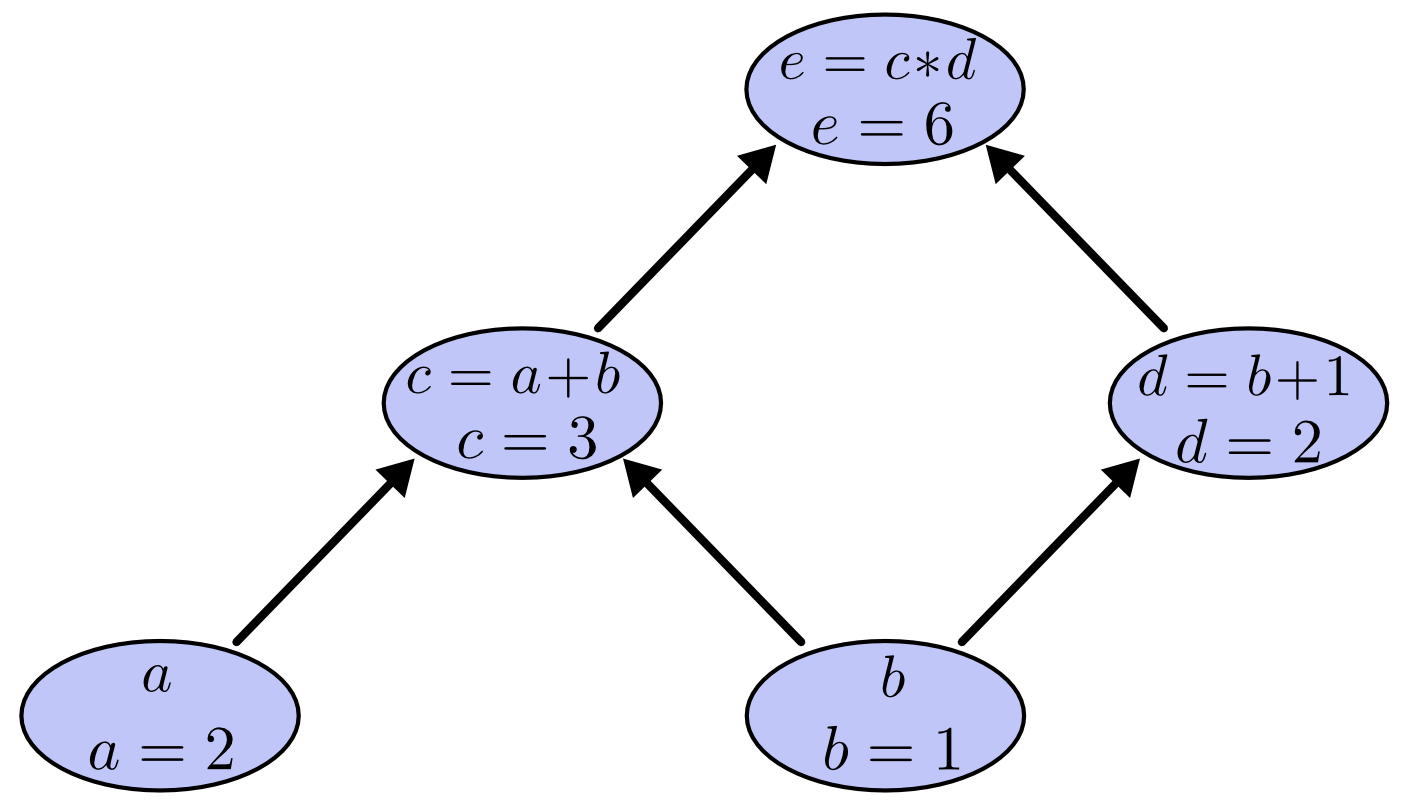


In [ ]:
a=torch.tensor(2.0,requires_grad=True)
b=torch.tensor(1.0,requires_grad=True)
c=a+b
d=b+1
e=c*d
print('c', c)
print('d', d)
print("e",e)

In [6]:
import torch
print( torch.__version__)
#conda install pytorch=1.2 网上说改为1.2就不报错了
cpu=torch.device("cpu")
gpu=torch.device("cuda")
x=torch.rand(10)
print(x)

x=x.to(gpu)
print(x)

x=x.to(cpu)

print(x)

1.7.1
tensor([0.6936, 0.6186, 0.9545, 0.4514, 0.8383, 0.9199, 0.8347, 0.2737, 0.9471,
        0.6759])


RuntimeError: CUDA error: no kernel image is available for execution on the device

### PyTorch as an auto grad framework
Now that we have seen that PyTorch keeps the graph around for us, let's use it to compute some gradients for us.

Consider the function $f(x) = (x-2)^2$.

Q: Compute $\frac{d}{dx} f(x)$ and then compute $f'(1)$.

We make a `backward()` call on the leaf variable (y) in the computation, computing all the gradients of y at once.

In [7]:
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)

x=torch.tensor([-1.0],requires_grad=True)
y=f(x)
y.backward()

print('Analytical f\'(x):',fp(x))
print('PyTorch\'s f\'(x):',x.grad)

Analytical f'(x): tensor([-6.], grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor([-6.])


It can also find gradients of functions.

Let $w = [w_1, w_2]^T$

Consider $g(w) = 2w_1w_2 + w_2\cos(w_1)$

Q: Compute $\nabla_w g(w)$ and verify $\nabla_w g([\pi,1]) = [2, 2\pi - 1]^T$

In [13]:
import numpy as np
def g(w):
    return 2*w[0]*w[1]+w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1]-w[1]*torch.sin(w[0]),2*w[0]+torch.cos(w[0])])

w=torch.tensor([np.pi,1],requires_grad=True)

z=g(w)
z.backward()
print('Analytical f\'(x):',grad_g(w))
print('PyTorch\'s f\'(x):',w.grad)
print(2*np.pi-1)

Analytical f'(x): tensor([2.0000, 5.2832])
PyTorch's f'(x): tensor([2.0000, 5.2832])
5.283185307179586


### Using the gradients
Now that we have gradients, we can use our favorite optimization algorithm: gradient descent!

Let $f$ the same function we defined above.

Q: What is the value of $x$ that minimizes $f$?

In [15]:
x = torch.tensor([5.0], requires_grad=True)
#步长
step_size = 0.25

print('iter,\tx,\tf(x),\tf\'(x),\tf\'(x) pytorch')
for i in range(15):
    y = f(x)
    y.backward() # compute the gradient
    
    print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}'.format(i, x.item(), f(x).item(), fp(x).item(), x.grad.item()))
    
    x.data = x.data - step_size * x.grad # perform a GD update step
    
    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    x.grad.detach_()
    #根据pytorch中的backward()函数的计算，当网络参量进行反馈时，梯度是被积累的而不是被替换掉；但是在每一个batch时毫无疑问并不需要将两个batch的梯度混合起来累积，因此这里就需要每个batch设置一遍zero_grad 了。
    x.grad.zero_()

iter,	x,	f(x),	f'(x),	f'(x) pytorch
0,	5.000,	9.000,	6.000,	6.000
1,	3.500,	2.250,	3.000,	3.000
2,	2.750,	0.562,	1.500,	1.500
3,	2.375,	0.141,	0.750,	0.750
4,	2.188,	0.035,	0.375,	0.375
5,	2.094,	0.009,	0.188,	0.188
6,	2.047,	0.002,	0.094,	0.094
7,	2.023,	0.001,	0.047,	0.047
8,	2.012,	0.000,	0.023,	0.023
9,	2.006,	0.000,	0.012,	0.012
10,	2.003,	0.000,	0.006,	0.006
11,	2.001,	0.000,	0.003,	0.003
12,	2.001,	0.000,	0.001,	0.001
13,	2.000,	0.000,	0.001,	0.001
14,	2.000,	0.000,	0.000,	0.000


gather 按行按列取某行或者某列第几个位置的数据

In [6]:
import torch
a=torch.Tensor([[1,2],[3,4]])
b=a.gather(1,torch.LongTensor([[0],[1]]))
print(b)

tensor([[1.],
        [4.]])


In [21]:
a=torch.randn(3,1)
print(a)
print(a.dim())
print(a.shape)
print()
b=torch.unsqueeze(a,1)
print(b)
print(b.dim())
print(b.shape)
print()
c=a.unsqueeze(0)
print(c)
print(c.shape)

tensor([[-0.9345],
        [ 1.3950],
        [-0.6217]])
2
torch.Size([3, 1])

tensor([[[-0.9345]],

        [[ 1.3950]],

        [[-0.6217]]])
3
torch.Size([3, 1, 1])

tensor([[[-0.9345],
         [ 1.3950],
         [-0.6217]]])
torch.Size([1, 3, 1])


In [16]:
import torch

x = torch.Tensor([1, 2, 3, 4])  # torch.Tensor是默认的tensor类型（torch.FlaotTensor）的简称。

print('-' * 50)
print(x)  # tensor([1., 2., 3., 4.])
print(x.size())  # torch.Size([4])
print(x.dim())  # 1
print(x.shape)
print(x.numpy())  # [1. 2. 3. 4.]

print('-' * 50)
print(torch.unsqueeze(x, 0))  # tensor([[1., 2., 3., 4.]])
print(torch.unsqueeze(x, 0).size())  # torch.Size([1, 4])
print(torch.unsqueeze(x, 0).dim())  # 2
print("shape",torch.unsqueeze(x, 0).shape) #torch.Size([1, 4])
print(torch.unsqueeze(x, 0).numpy())  # [[1. 2. 3. 4.]]

print('-' * 50)
print(torch.unsqueeze(x, 1))
# tensor([[1.],
#         [2.],
#         [3.],
#         [4.]])
print(torch.unsqueeze(x, 1).size())  # torch.Size([4, 1])
print(torch.unsqueeze(x, 1).dim())  # 2

print('-' * 50)
print(torch.unsqueeze(x, -1))
# tensor([[1.],
#         [2.],
#         [3.],
#         [4.]])
print(torch.unsqueeze(x, -1).size())  # torch.Size([4, 1])
print(torch.unsqueeze(x, -1).dim())  # 2

print('-' * 50)
print(torch.unsqueeze(x, -2))  # tensor([[1., 2., 3., 4.]])
print(torch.unsqueeze(x, -2).size())  # torch.Size([1, 4])
print(torch.unsqueeze(x, -2).dim())  # 2

# 边界测试
# 说明：A dim value within the range [-input.dim() - 1, input.dim() + 1) （左闭右开）can be used.
# print('-' * 50)
# print(torch.unsqueeze(x, -3))
# IndexError: Dimension out of range (expected to be in range of [-2, 1], but got -3)

# print('-' * 50)
# print(torch.unsqueeze(x, 2))
# IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

# 为何取值范围要如此设计呢？
# 原因：方便操作
# 0(-2)-行扩展
# 1(-1)-列扩展
# 正向：我们在0，1位置上扩展
# 逆向：我们在-2，-1位置上扩展
# 维度扩展：1维->2维，2维->3维，...，n维->n+1维
# 维度降低：n维->n-1维，n-1维->n-2维，...，2维->1维

# 以 1维->2维 为例，

# 从【正向】的角度思考：

# torch.Size([4])
# 最初的 tensor([1., 2., 3., 4.]) 是 1维，我们想让它扩展成 2维，那么，可以有两种扩展方式：

# 一种是：扩展成 1行4列 ，即 tensor([[1., 2., 3., 4.]])
# 针对第一种，扩展成 [1, 4]的形式，那么，在 dim=0 的位置上添加 1

# 另一种是：扩展成 4行1列，即
# tensor([[1.],
#         [2.],
#         [3.],
#         [4.]])
# 针对第二种，扩展成 [4, 1]的形式，那么，在dim=1的位置上添加 1

# 从【逆向】的角度思考：
# 原则：一般情况下， "-1" 是代表的是【最后一个元素】
# 在上述的原则下，
# 扩展成[1, 4]的形式，就变成了，在 dim=-2 的的位置上添加 1
# 扩展成[4, 1]的形式，就变成了，在 dim=-1 的的位置上添加 1

--------------------------------------------------
tensor([1., 2., 3., 4.])
torch.Size([4])
1
torch.Size([4])
[1. 2. 3. 4.]
--------------------------------------------------
tensor([[1., 2., 3., 4.]])
torch.Size([1, 4])
2
shape torch.Size([1, 4])
[[1. 2. 3. 4.]]
--------------------------------------------------
tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([4, 1])
2
--------------------------------------------------
tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([4, 1])
2
--------------------------------------------------
tensor([[1., 2., 3., 4.]])
torch.Size([1, 4])
2


torch.max()使用讲解 

输入

input是softmax函数输出的一个tensor
dim是max函数索引的维度0/1，0是每列的最大值，1是每行的最大值

输出

函数会返回两个tensor，第一个tensor是每行的最大值；第二个tensor是每行最大值的索引。

In [22]:
import torch
a = torch.tensor([[1,5,62,54], [2,6,2,6], [2,65,2,6]])
print(a)
print(torch.max(a, 1))
print(torch.max(a, 1)[1].numpy())

tensor([[ 1,  5, 62, 54],
        [ 2,  6,  2,  6],
        [ 2, 65,  2,  6]])
torch.return_types.max(
values=tensor([62,  6, 65]),
indices=tensor([2, 1, 1]))
[2 1 1]



Linear Regression 

Now, instead of minimizing a made-up function, lets minimize a loss function on some made-up data.

We will implement Gradient Descent in order to solve the task of linear regression.

In [23]:

# make a simple linear dataset with some noise
d=2
n=50
X=torch.randn(n,d)
true_w=torch.tensor([[-1.0],[2.0]])
y=X@true_w+torch.randn(n,1)*0.1
print("y shape",y.shape)
print("X shape",X.shape)
print("TRUE_W shape",true_w.shape)

y shape torch.Size([50, 1])
X shape torch.Size([50, 2])
TRUE_W shape torch.Size([2, 1])


Note: dimensions 

PyTorch does a lot of operations on batches of data. The convention is to have your data be of size $(N, d)$ where $N$ is the size of the batch of data.

Sanity check 

To verify PyTorch is computing the gradients correctly, let's recall the gradient for the RSS objective:

$$\nabla_w \mathcal{L}_{RSS}(w; X) = \nabla_w\frac{1}{n} ||y - Xw||_2^2 = -\frac{2}{n}X^T(y-Xw)$$

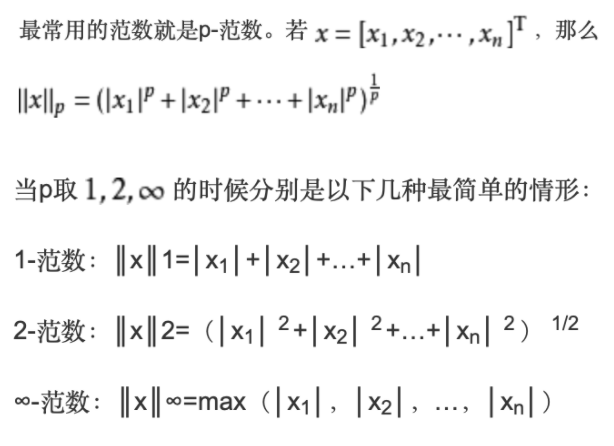

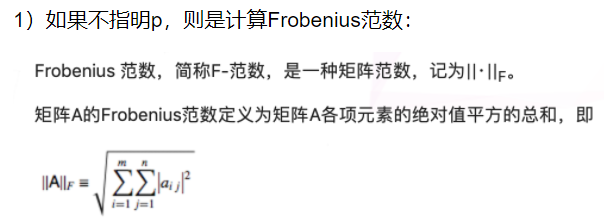

In [25]:

# define a linear model with no bias
def model(X,w):
    return X@w

# the residual sum of squares loss function 残差平方和函数
def rss(y,y_hat):
    return torch.norm(y-y_hat)**2/n #norm 为求范数

def grad_rss(X, y, w):
    return -2*X.t()@(y-X@w)/n

w=torch.tensor([[1.],[0]],requires_grad=True)
y_hat=model(X,w)#决策函数要求w
loss=rss(y,y_hat)
loss.backward()
#detach代表仅计算结果，不带梯度 参考https://www.jb51.net/article/177397.htm
#viewview函数可以改变tensor的形状  view(2)代表转为个数为2的数组 view(3,-1) #-1表示程序会根据上一个维度自动计算-1所在位置的维度 view(4,2)代表转为4x2的矩阵
print('Analytical gradient', grad_rss(X, y, w).detach().view(2).numpy())
print('PyTorch\'s gradient', w.grad.view(2).numpy())# w.grad 的偏导数


Analytical gradient [ 4.219836  -2.1873062]
PyTorch's gradient [ 4.2198367 -2.1873064]


Linear regression using GD with automatically computed derivatives
We will now use the gradients to run the gradient descent algorithm.

Note: This example is an illustration to connect ideas we have seen before to PyTorch's way of doing things. We will see how to do this in the "PyTorchic" way in the next example.

In [26]:
step_size = 0.1

print('iter,\tloss,\tw')
for i in range(20):
    y_hat = model(X, w)
    loss = rss(y, y_hat)
    
    loss.backward() # compute the gradient of the loss
    
    w.data = w.data - step_size * w.grad # do a gradient descent step
    
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), w.view(2).detach().numpy()))
    
    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    w.grad.detach() #去除他的求偏导数轨迹
    w.grad.zero_()  #梯度变为0

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', w.view(2).detach().numpy())

iter,	loss,	w
0,	6.46,	[0.15603262 0.4374613 ]
1,	2.81,	[-0.08060659  0.6173868 ]
2,	2.00,	[-0.2665165  0.7789613]
3,	1.45,	[-0.41300973  0.92348087]
4,	1.06,	[-0.5288156  1.0523174]
5,	0.78,	[-0.62067837  1.1668527 ]
6,	0.58,	[-0.6938152  1.2684344]
7,	0.44,	[-0.7522682  1.3583472]
8,	0.33,	[-0.7991743  1.4377954]
9,	0.25,	[-0.8369725  1.5078943]
10,	0.19,	[-0.8675627  1.5696665]
11,	0.15,	[-0.89242864  1.6240423 ]
12,	0.11,	[-0.91273147  1.6718626 ]
13,	0.09,	[-0.9293827  1.713884 ]
14,	0.07,	[-0.9430997  1.7507838]
15,	0.06,	[-0.95444894  1.7831668 ]
16,	0.04,	[-0.9638792  1.8115709]
17,	0.04,	[-0.9717474  1.8364736]
18,	0.03,	[-0.97833824  1.858298  ]
19,	0.02,	[-0.98388004  1.8774179 ]

true w		 [-1.  2.]
estimated w	 [-0.98388004  1.8774179 ]



torch.nn.Module

Module is PyTorch's way of performing operations on tensors. Modules are implemented as subclasses of the `torch.nn.Module class`. All modules are callable and can be composed together to create complex functions.

要实现神经网络，可以设置类继承 torch.nn.Module，从而构造复杂模块

Note: most of the functionality implemented for modules can be accessed in a functional form `via torch.nn.functional`, but these require you to create and manage the weight tensors yourself.



Linear Module

The bread and butter of modules is the Linear module which does a linear transformation with a bias. It takes the input and output dimensions as parameters, and creates the weights in the object.

Unlike how we initialized our $w$ manually, the Linear module automatically initializes the weights randomly. For minimizing non convex loss functions (e.g. training neural networks), initialization is important and can affect results. If training isn't working as well as expected, one thing to try is manually initializing the weights to something different from the default. PyTorch implements some common initializations in torch.nn.init.

torch.nn.init docs

`torch.nn.Linear`可以自己生成权重向量，但是如果复杂的调参，则需要自己设置权重

In [4]:
d_in=3
d_out=4
#说明入参的特征数有三个（三个列），结果的特征数有四个（四列）
linear_module=nn.Linear(d_in,d_out)
#这里相当于两个样本
example_tensor=torch.tensor([[1.,2,3],[4,5,6]])
# applys a linear transformation to the data
#z=w*x+b
transformed=linear_module(example_tensor)
#入
print('example_tensor', example_tensor.shape)
#出
print('transormed', transformed.shape)
print()
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)

example_tensor torch.Size([2, 3])
transormed torch.Size([2, 4])

We can see that the weights exist in the background

W: Parameter containing:
tensor([[ 0.0968,  0.1537, -0.3115],
        [-0.5393, -0.3418, -0.5293],
        [-0.3164, -0.2906,  0.4814],
        [ 0.3724, -0.0847,  0.3947]], requires_grad=True)
b: Parameter containing:
tensor([-0.0275,  0.2247, -0.3916,  0.5080], requires_grad=True)


#### Activation functions

PyTorch implements a number of activation functions including but not limited to ReLU, Tanh, and Sigmoid. Since they are modules, they need to be instantiated.

In [5]:
activation_fn=nn.ReLU()#这是个类，使用前需要实例化一下
example_tensor=torch.tensor([-1.,1,0])
activated=activation_fn(example_tensor)

print("example_tensor",example_tensor)
print("activated",activated)

example_tensor tensor([-1.,  1.,  0.])
activated tensor([0., 1., 0.])



#### Sequential
Many times, we want to compose Modules together. torch.nn.Sequential provides a good interface for composing simple modules.

In [16]:
#这里是使用了一次前向传播，没有使用梯度下降，没有定义损失函数
d_in=3
d_hidden=4
d_out=1
model=torch.nn.Sequential(
nn.Linear(d_in,d_hidden),
nn.Sigmoid(),
nn.Linear(d_hidden,d_out),
nn.Tanh()
)
example_tensor=torch.tensor([[1.,2,3],[3,4,5]])
transformed=model(example_tensor)
print("transformed shape:",transformed.shape)

transformed shape: torch.Size([2, 1])


Note: we can access all of the parameters (of any nn.Module) with the parameters() method.

获取神经网络参数：如 权重等

In [18]:
params=model.parameters()
#入参是：2x3
#输入层到第一层隐藏层权重w是：4x3
#输入层到第一层隐藏层偏执b是：4
#输入层到第一层隐藏层结果是：2x4
#第一层隐藏层到第二层隐藏层权重是：1x4
#第一层隐藏层到第二层隐藏层偏执是：1
#所以神经网络的公式为 wt*x+b
for param in params:
    print(param)

Parameter containing:
tensor([[-0.3181,  0.4646,  0.4297],
        [ 0.4828, -0.1578,  0.0810],
        [-0.2599,  0.5232, -0.4874],
        [ 0.1795,  0.0713, -0.1921]], requires_grad=True)
Parameter containing:
tensor([ 0.3648, -0.1181,  0.5671,  0.3901], requires_grad=True)
Parameter containing:
tensor([[-0.0374,  0.1756,  0.2832,  0.1891]], requires_grad=True)
Parameter containing:
tensor([0.1965], requires_grad=True)


#### Loss functions
PyTorch implements many common loss functions including MSELoss and CrossEntropyLoss.

In [20]:
#损失函数

mse_loss_fn=nn.MSELoss()

input=torch.tensor([[0.,0,0]])
target=torch.tensor([[1,0,-1]])
#对应相减取平方，的和 再取均值
loss=mse_loss_fn(input,target)
print(loss)
#相当于2/3

tensor(0.6667)



#### torch.optim
#### 优化器
PyTorch implements a number of gradient-based optimization methods in torch.optim, including Gradient Descent. At the minimum, it takes in the model parameters and a learning rate.

优化器实现了一些基于梯度的优化算法，优化器的参数至少只需要 模型参数和学习率

Optimizers do not compute the gradients for you, so you must call `backward()` yourself. You also must call the `optim.zero_grad()` function before calling `backward()` since by default PyTorch does and inplace add to the .grad member variable rather than overwriting it.

This does both the detach_() and zero_() calls on all tensor's grad variables.

[torch.optim docs](https://pytorch.org/docs/stable/optim.html)

In [35]:
# create a simple modle 只有一个输入和一个输出的神经模型
#1.
modle=nn.Linear(1,1)

#2.样本
#create a simple dataset
X_simple=torch.tensor([[1.]])
Y_simple=torch.tensor([[2.]])
#知道了x y求 w

#create our opoptimizer
optim=torch.optim.SGD(modle.parameters(),lr=1e-2)
mse_loss_fn=nn.MSELoss()

y_hat=modle(X_simple)
print('model params before:', modle.weight)
loss=mse_loss_fn(Y_simple,y_hat)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', modle.weight)

#解析：这里使用了一次梯度下降
#以上例子中说明了构建神经网络所需要的步骤：
# 1. 首先定义神经模型
# 2.样本（输入和输出）
# 3.有了模型（神经网络），可以构建基于梯度的优化器
# 4.定义使用的损失函数
# 5.optim.zero_grad()后再计算梯度
# 6.下一次循环

model params before: Parameter containing:
tensor([[0.5461]], requires_grad=True)
model params after: Parameter containing:
tensor([[0.5918]], requires_grad=True)


#### Linear regression using GD with automatically computed derivatives and PyTorch's Modules

Now let's combine what we've learned to solve linear regression in a "PyTorchic" way.

In [39]:
d=2
n=50
X=torch.randn(n,d)
true_w=torch.tensor([[-1.0],[2.0]])
y=X@true_w+torch.randn(n,1)*0.1

step_size=0.1
linear_module=nn.Linear(d,1,bias=False)
loss_fn=nn.MSELoss()
optim=torch.optim.SGD(linear_module.parameters(),lr=step_size)

print('iter,\tloss,\tw')

for i in range(20):
    y_hat=linear_module(X)
    loss=loss_fn(y_hat,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	9.16,	[ 0.35560015 -0.08427703]
1,	5.93,	[0.11793426 0.33424738]
2,	3.84,	[-0.07730529  0.668241  ]
3,	2.49,	[-0.23777911  0.9347276 ]
4,	1.62,	[-0.36974904  1.14731   ]
5,	1.05,	[-0.47833627  1.3168569 ]
6,	0.69,	[-0.5677314  1.4520507]
7,	0.45,	[-0.6413653  1.5598271]
8,	0.29,	[-0.7020486  1.6457255]
9,	0.20,	[-0.752085   1.7141691]
10,	0.13,	[-0.7933635  1.7686901]
11,	0.09,	[-0.8274343  1.8121078]
12,	0.06,	[-0.85556996  1.8466729 ]
13,	0.04,	[-0.8788158  1.8741814]
14,	0.03,	[-0.898031   1.8960663]
15,	0.02,	[-0.9139219  1.913471 ]
16,	0.02,	[-0.92706984  1.9273071 ]
17,	0.01,	[-0.9379533  1.9383018]
18,	0.01,	[-0.9469663  1.9470347]
19,	0.01,	[-0.9544336  1.9539679]

true w		 [-1.  2.]
estimated w	 [-0.9544336  1.9539679]


#### Linear regression using SGD

In the previous examples, we computed the average gradient over the entire dataset (Gradient Descent). We can implement Stochastic Gradient Descent with a simple modification.

In [100]:
#上面的例子是平均梯度下降   下面修改成随机梯度下降
import numpy as np
#构造样本集
d=2
n=50
X=torch.randn(n,d)
true_w=torch.tensor([[-1.0],[2.0]])
y=X@true_w+torch.randn(n,1)*0.1

step_size=0.1

linear_model=nn.Linear(d,1)
optim=torch.optim.SGD(linear_model.parameters(),lr=step_size)
loss_fn=nn.MSELoss()
print('iter,\tloss,\tw')

for i in range(200):
    rand_index=np.random.choice(n)#一次从五十个样本里面选一个，注意是一个
    x_choosed=X[rand_index]
    y_choosed=y[rand_index]
    y_hat=linear_model(x_choosed)
    loss=loss_fn(y_hat,y_choosed)# only compute the loss on the single point 单点计算
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i%20==0:
        print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_model.weight.view(2).detach().numpy()))
        
print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	0.65,	[-0.12244399  0.42943618]
20,	1.65,	[-0.9171766  1.5718727]
40,	0.03,	[-0.998998   1.7680892]
60,	0.03,	[-1.008021   1.9429936]
80,	0.00,	[-1.1007504  1.9547509]
100,	0.00,	[-0.93298984  1.9762872 ]
120,	0.01,	[-0.90310526  1.9965669 ]
140,	0.00,	[-0.98658293  1.9081144 ]
160,	0.01,	[-1.053252   1.9905466]
180,	0.01,	[-1.0378904  1.999379 ]

true w		 [-1.  2.]
estimated w	 [-0.9544336  1.9539679]


Here we define a simple two hidden layer neural network with Tanh activations. There are a few hyper parameters to play with to get a feel for how they change the results.

玩一下超参数

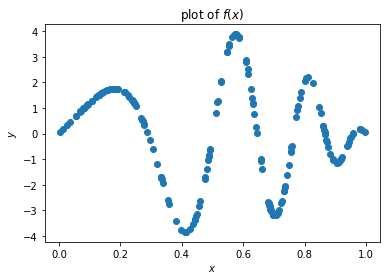

In [43]:

%matplotlib inline

d = 1
n = 200
X = torch.rand(n,d)
y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)

plt.scatter(X.numpy(), y.numpy())
plt.title('plot of $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

In [99]:
# import numpy as np

# https://blog.csdn.net/u010137742/article/details/100996937?utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-12.baidujs&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-12.baidujs

#从200个数据集的下标里选60个，返回的是一个迭代器
# index=torch.utils.data.SubsetRandomSampler(np.random.choice(range(n), 60))
# for i in index:
#     print(i)



In [96]:
import numpy as np

#神经网络超参
step_size=0.05
n_episodes=6000
d_in=1
d_out=1
d_hidden1=32
d_hidden2=32

#数据集开始
d = 1
n = 200
X = torch.rand(n,d)
y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)
#数据集结束

#神经网络结构(为什么Sigmoid不能拟合，要用Tanh)解释（因为要拟合的函数正负都有，Sigmoid只在正区间）
neural_network=nn.Sequential(
    nn.Linear(d_in,d_hidden1),
    nn.Tanh(),
    nn.Linear(d_hidden1,d_hidden2),
    nn.Tanh(),
    nn.Linear(d_hidden2,d_out)
)
#损失函数
loss_fn=nn.MSELoss()

optim=torch.optim.SGD(neural_network.parameters(),lr=step_size)
#使用随机梯度下降（为什么使用随机梯度下降不能拟合，要改为平均梯度下降）
print('iter,\tloss')
for i in range(n_episodes):
    indices=torch.tensor( np.random.choice(range(n), 60),dtype=torch.int64)#先生成一个长度为60的index数组，转为张量
    X_samples=torch.index_select(X,0,indices)#从样本中选出指定index的样本
    y_samples=torch.index_select(y,0,indices)

    loss=loss_fn(neural_network(X_samples),y_samples)


    #这里改回平均梯度下降才正常
#     y_hat = neural_network(X)
#     loss = loss_fn(y_hat, y)
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % (n_episodes // 10) == 0:
        print('{},\t{:.2f}'.format(i,loss.item()))

#随机梯度下降的特点，loss浮动

iter,	loss
0,	4.04
600,	3.06
1200,	4.20
1800,	2.72
2400,	1.17
3000,	0.56
3600,	0.72
4200,	0.12
4800,	0.11
5400,	0.22


In [ ]:
#torch.select_index : https://blog.csdn.net/anshiquanshu/article/details/112510796
#np.random.choice : https://www.cnblogs.com/cloud-ken/p/9931273.html

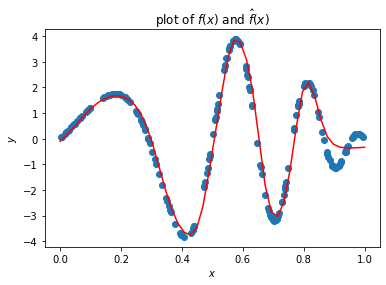

In [97]:
X_grid = torch.from_numpy(np.linspace(0,1,50)).float().view(-1, d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### Things that might help on the homework

#### Brief Sidenote: Momentum

There are other optimization algorithms besides stochastic gradient descent. One is a modification of SGD called momentum. We won't get into it here, but if you would like to read more [here](https://distill.pub/2017/momentum/) is a good place to start.

We only change the step size and add the momentum keyword argument to the optimizer. Notice how it reduces the training loss in fewer iterations.

In [103]:
#增加了momentum来训练网络，迭代次数反而少了
#神经网络超参
step_size=0.05
momentum=0.9
n_episodes=1500 #之前是6000
d_hidden1=32
d_hidden2=32
d_in=1
d_out=1

#数据集开始
d = 1
n = 200
X = torch.rand(n,d)
y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)
#数据集结束

net=nn.Sequential(
nn.Linear(d_in,d_hidden1),
    nn.Tanh(),
    nn.Linear(d_hidden1,d_hidden2),
    nn.Tanh(),
    nn.Linear(d_hidden2,d_out)
)

loss_fn=nn.MSELoss()
optim=torch.optim.SGD(net.parameters(),lr=step_size,momentum=momentum)
print('iter,\tloss')
for i in range(n_episodes):
    y_hat=net(X)
    loss=loss_fn(y_hat,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % (n_episodes // 10) == 0:
        print('{},\t{:.2f}'.format(i,loss.item()))

iter,	loss
0,	4.18
150,	2.61
300,	0.52
450,	0.16
600,	0.07
750,	0.03
900,	0.01
1050,	0.00
1200,	0.00
1350,	0.00


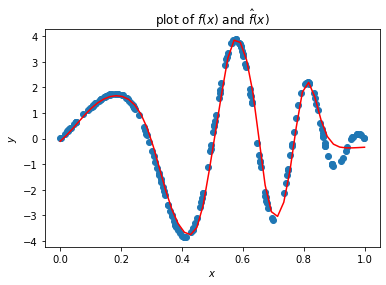

In [104]:
X_grid = torch.from_numpy(np.linspace(0,1,50)).float().view(-1, d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


### CrossEntropyLoss

So far, we have been considering regression tasks and have used the [MSELoss](https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss) module. For the homework, we will be performing a classification task and will use the cross entropy loss.

PyTorch implements a version of the cross entropy loss in one module called [CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss). Its usage is slightly different than MSE, so we will break it down here.

`input`: The first parameter to CrossEntropyLoss is the output of our network. It expects a real valued tensor of dimensions $(N,C)$ where $N$ is the minibatch size and $C$ is the number of classes. In our case $N=3$ and $C=2$. The values along the second dimension correspond to raw unnormalized scores for each class. The CrossEntropyLoss module does the softmax calculation for us, so we do not need to apply our own softmax to the output of our neural network.

`output`: The second parameter to CrossEntropyLoss is the true label. It expects an integer valued tensor of dimension $(N)$. The integer at each element corresponds to the correct class. In our case, the "correct" class labels are class 0, class 1, and class 1.
Try out the loss function on three toy predictions. The true class labels are $y=[1,1,0]$. The first two examples correspond to predictions that are "correct" in that they have higher raw scores for the correct class. The second example is "more confident" in the prediction, leading to a smaller loss. The last two examples are incorrect predictions with lower and higher confidence respectively.

In [113]:
#交叉熵 解释：https://zhuanlan.zhihu.com/p/98785902

loss = nn.CrossEntropyLoss()
# 这里的意思是有三个样本，二分类问题，[-1., 1]代表网络预测出是正类的值是-1，负类的值（softmax后就是概率了）是1
#input = torch.tensor([[-1., 1],[-1, 1],[1, -1]]) # raw scores correspond to the correct class
input = torch.tensor([[-3., 3],[-3, 3],[3, -3]]) # raw scores correspond to the correct class with higher confidence
# input = torch.tensor([[1., -1],[1, -1],[-1, 1]]) # raw scores correspond to the incorrect class
# input = torch.tensor([[3., -3],[3, -3],[-3, 3]]) # raw scores correspond to the incorrect class with incorrectly placed confidence

target = torch.tensor([1, 1, 0])
output = loss(input, target)
print(output)

tensor(0.0025)


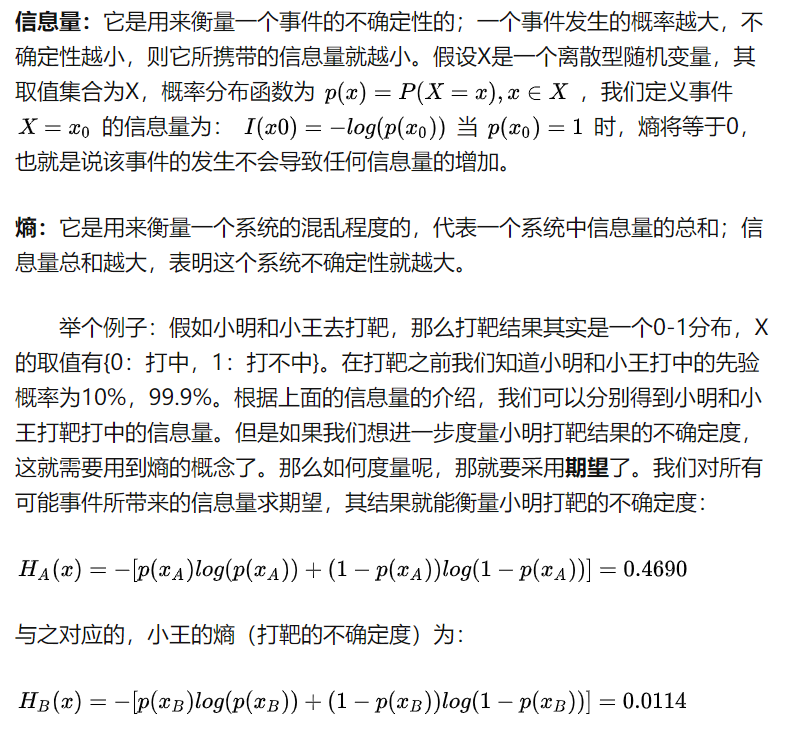

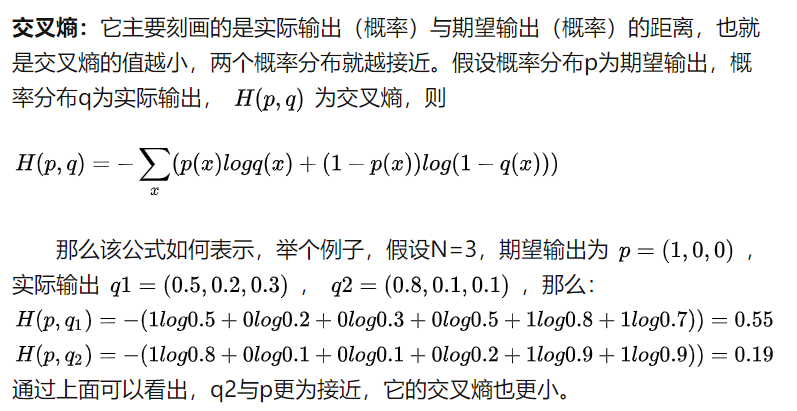



### Learning rate schedulers¶
### 学习率的调整
Often we do not want to use a fixed learning rate throughout all training. PyTorch offers learning rate schedulers to change the learning rate over time. Common strategies include multiplying the lr by a constant every epoch (e.g. 0.9) and halving the learning rate when the training loss flattens out.

See the [learning rate scheduler docs](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) for usage and examples


### Convolutions
### 卷积
When working with images, we often want to use convolutions to extract features using convolutions. PyTorch implments this for us in the torch.nn.Conv2d module. It expects the input to have a specific dimension $(N, C_{in}, H_{in}, W_{in})$ where $N$ is batch size, $C_{in}$ is the number of channels the image has, and $H_{in}, W_{in}$ are the image height and width respectively.

We can modify the convolution to have different properties with the parameters:

`kernel_size`

`stride`

`padding`

They can change the output dimension so be careful.

See the [torch.nn.Conv2d docs](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d) for more information.

To illustrate what the Conv2d module is doing, let's set the conv weights manually to a Gaussian blur kernel.

We can see that it applies the kernel to the image.

In [116]:
import numpy as np
# an entire mnist digit
image = np.array([0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3803922 , 0.37647063, 0.3019608 ,0.46274513, 0.2392157 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3529412 , 0.5411765 , 0.9215687 ,0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 ,0.9843138 , 0.9843138 , 0.9725491 , 0.9960785 , 0.9607844 ,0.9215687 , 0.74509805, 0.08235294, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.54901963,0.9843138 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.7411765 , 0.09019608, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8862746 , 0.9960785 , 0.81568635,0.7803922 , 0.7803922 , 0.7803922 , 0.7803922 , 0.54509807,0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 ,0.5019608 , 0.8705883 , 0.9960785 , 0.9960785 , 0.7411765 ,0.08235294, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.14901961, 0.32156864, 0.0509804 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.13333334,0.8352942 , 0.9960785 , 0.9960785 , 0.45098042, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.32941177, 0.9960785 ,0.9960785 , 0.9176471 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.32941177, 0.9960785 , 0.9960785 , 0.9176471 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.4156863 , 0.6156863 ,0.9960785 , 0.9960785 , 0.95294124, 0.20000002, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.09803922, 0.45882356, 0.8941177 , 0.8941177 ,0.8941177 , 0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.94117653, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.26666668, 0.4666667 , 0.86274517,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.5568628 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.14509805, 0.73333335,0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 , 0.8745099 ,0.8078432 , 0.8078432 , 0.29411766, 0.26666668, 0.8431373 ,0.9960785 , 0.9960785 , 0.45882356, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.4431373 , 0.8588236 , 0.9960785 , 0.9490197 , 0.89019614,0.45098042, 0.34901962, 0.12156864, 0., 0.,0., 0., 0.7843138 , 0.9960785 , 0.9450981 ,0.16078432, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.6627451 , 0.9960785 ,0.6901961 , 0.24313727, 0., 0., 0.,0., 0., 0., 0., 0.18823531,0.9058824 , 0.9960785 , 0.9176471 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.07058824, 0.48627454, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.32941177, 0.9960785 , 0.9960785 ,0.6509804 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.54509807, 0.9960785 , 0.9333334 , 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8235295 , 0.9803922 , 0.9960785 ,0.65882355, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.9490197 , 0.9960785 , 0.93725497, 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.34901962, 0.9843138 , 0.9450981 ,0.3372549 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.01960784,0.8078432 , 0.96470594, 0.6156863 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.01568628, 0.45882356, 0.27058825,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.], dtype=np.float32)
#  (𝑁,𝐶𝑖𝑛,𝐻𝑖𝑛,𝑊𝑖𝑛) 
image_torch = torch.from_numpy(image).view(1, 1, 28, 28)

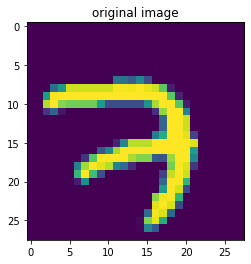

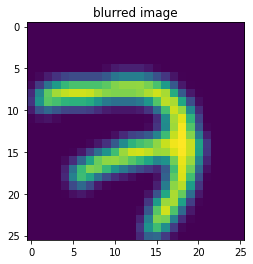

In [117]:
# a gaussian blur kernel
gaussian_kernel = torch.tensor([[1., 2, 1],[2, 4, 2],[1, 2, 1]]) / 16.0

conv = nn.Conv2d(1, 1, 3)
# manually set the conv weight
conv.weight.data[:] = gaussian_kernel

convolved = conv(image_torch)

plt.title('original image')
plt.imshow(image_torch.view(28,28).detach().numpy())
plt.show()

plt.title('blurred image')
plt.imshow(convolved.view(26,26).detach().numpy())
plt.show()

As we can see, the image is blurred as expected.

In practice, we learn many kernels at a time. In this example, we take in an RGB image (3 channels) and output a 16 channel image. After an activation function, that could be used as input to another Conv2d module.

卷积可以是下一个卷积的输入

In [118]:

im_channels = 3 # if we are working with RGB images, there are 3 input channels, with black and white, 1
out_channels = 16 # this is a hyperparameter we can tune
kernel_size = 3 # this is another hyperparameter we can tune
batch_size = 4
image_width = 32
image_height = 32

im = torch.randn(batch_size, im_channels, image_width, image_height)

m = nn.Conv2d(im_channels, out_channels, kernel_size)
convolved = m(im) # it is a module so we can call it

print('im shape', im.shape)
print('convolved im shape', convolved.shape)

im shape torch.Size([4, 3, 32, 32])
convolved im shape torch.Size([4, 16, 30, 30])



### Useful links:
- [60 minute PyTorch Tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [PyTorch Docs](https://pytorch.org/docs/stable/index.html)
- [Lecture notes on Auto-Diff](https://courses.cs.washington.edu/courses/cse446/19wi/notes/auto-diff.pdf)

### Custom Datasets, DataLoaders

This is modified from pytorch official tutorial. Author: Sasank Chilamkurthy <https://chsasank.github.io>_

A lot of effort in solving any machine learning problem goes in to preparing the data. PyTorch provides many tools to make data loading easy and hopefully, to make your code more readable. In this tutorial, we will see how to load and preprocess/augment data from a non trivial dataset.

### Dataset class

`torch.utils.data.Dataset` is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:

`__len__` so that len(dataset) returns the size of the dataset.

`__getitem__` to support the indexing such that dataset[i] can be used to get $i$\ th sample

Let's create a dataset class for our face landmarks dataset. We will read the csv in __init__ but leave the reading of images to __getitem__. This is memory efficient because all the images are not stored in the memory at once but read as required.

Sample of our dataset will be a dict {'image': image, 'landmarks': landmarks}. Our dataset will take an optional argument transform so that any required processing can be applied on the sample. We will see the usefulness of transform in the next section.

In [ ]:
from torch.utils.data import Dataset,DataLoader

class FakeDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    

However, we are losing a lot of features by using a simple for loop to iterate over the data. In particular, we are missing out on:

- Batching the data
- Shuffling the data
- Load the data in parallel using multiprocessing workers.

`torch.utils.data.DataLoader` is an iterator which provides all these features. Parameters used below should be clear. One parameter of interest is `collate_fn`. You can specify how exactly the samples need to be batched using `collate_fn`. However, default collate should work fine for most use cases.

In [127]:
from torch.utils.data import Dataset,DataLoader

class FakeDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]


x = np.random.rand(100, 10)
y = np.random.rand(100)

dataset = FakeDataset(x, y)
# https://blog.csdn.net/weixin_30401605/article/details/102358298
dataloader = DataLoader(dataset, batch_size=4,
                        shuffle=True)
#每次抽四个样本 包含 x y
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched)

0 [tensor([[0.8321, 0.3020, 0.6598, 0.6733, 0.4713, 0.3724, 0.0903, 0.5512, 0.3639,
         0.3083],
        [0.9552, 0.2602, 0.3109, 0.9319, 0.3281, 0.1032, 0.3602, 0.9372, 0.9721,
         0.1782],
        [0.6475, 0.3468, 0.4876, 0.1384, 0.7914, 0.8714, 0.1888, 0.1256, 0.7122,
         0.2353],
        [0.5093, 0.8682, 0.7483, 0.5289, 0.9116, 0.9305, 0.8119, 0.7140, 0.4087,
         0.9719]], dtype=torch.float64), tensor([0.7401, 0.8739, 0.2497, 0.3838], dtype=torch.float64)]
1 [tensor([[0.0315, 0.3279, 0.0814, 0.7181, 0.0407, 0.1786, 0.9345, 0.9237, 0.0474,
         0.5562],
        [0.1517, 0.9475, 0.5272, 0.6839, 0.9714, 0.0153, 0.1621, 0.5163, 0.4723,
         0.4531],
        [0.5741, 0.9233, 0.8429, 0.5545, 0.7634, 0.1775, 0.6901, 0.4314, 0.4322,
         0.7109],
        [0.1621, 0.5651, 0.8998, 0.8442, 0.4001, 0.3051, 0.3519, 0.9358, 0.8094,
         0.7109]], dtype=torch.float64), tensor([0.8459, 0.1644, 0.7304, 0.2386], dtype=torch.float64)]
2 [tensor([[0.2010, 0.4927, 0.